## Parte I: catálogo de estrellas brillantes
El archivo "bsc_sel.dat" (proveniente del “Bright Star Catalog”) contiene una tabla con información para
aproximadamente las 9100 estrellas más brillantes del cielo. Sus columnas son:

• HR: un identificador correlativo en el catálogo.

• HD: identificador en el catálogo Henry Draper.

• Vmag: magnitud visual (en el filtro V).

• B-V: color (la diferencia de magnitudes en las bandas fotompétricas B y V).

• SpType: tipo espectral.

Debe considerar que algunos valores, en algunas columnas, pueden ser NaN, por lo que podría tener que hacer
verificaciones para evitar esos valores en algunos casos.

**Pregunta 1** (4 puntos)

• Encontrar cuales son las 10 categorías más frecuentes de los tipos espectrales.

• Hacer un gráfico de barras para estas 10 categorías, con los ejes y barras correctamente etiquetados.

• Calcular la moda de los tipos espectrales (usando su librería) ¿coincide esto con lo que puede leer del gráfico de barras?

• ¿Cuáles son los tres tipos espectrales más comunes de la muestra?

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Leemos el archivo
df = pd.read_csv('bsc_sel.dat', sep='\s+', header=None, names=['HR', 'HD', 'Vmag', 'B-V', 'SpType'])

# Verificamos si existen valores NaN en la columna 'SpType'
print(df['SpType'].isnull().sum())

9110


La moda de los tipos espectrales es: K0III
La moda coincide con el tipo espectral más frecuente en el gráfico de barras.
Los tres tipos espectrales más comunes de la muestra son: ['K0III' 'K1III' 'G8III']


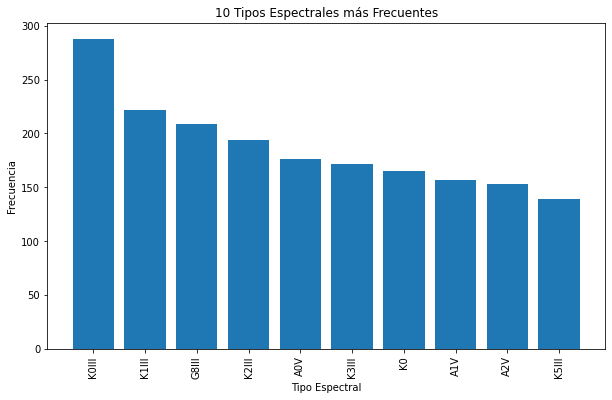

In [153]:
from scipy import stats

# Cargamos los datos
data = np.genfromtxt('bsc_sel.dat', dtype=str, usecols=(4), invalid_raise=False)

# Eliminamos los valores Nan existentes
tipos_espectrales = data[data != '']

# Encontramos las 10 categorías más frecuentes de los tipos espectrales
unicos, conteos = np.unique(tipos_espectrales, return_counts=True)
ordenados = np.argsort(conteos)[::-1]
top_10 = unicos[ordenados[:10]]

# Gráfico de barras para estas 10 categorías
plt.figure(figsize=(10, 6))
plt.bar(top_10, conteos[ordenados[:10]])
plt.xlabel('Tipo Espectral')
plt.ylabel('Frecuencia')
plt.title('10 Tipos Espectrales más Frecuentes')
plt.xticks(rotation=90)

# Calculamos la moda de los tipos espectrales
moda = stats.mode(tipos_espectrales)[0][0]
print(f'La moda de los tipos espectrales es: {moda}')
print('La moda coincide con el tipo espectral más frecuente en el gráfico de barras.')

# Los tres tipos espectrales más comunes de la muestra
tres_mas_comunes = top_10[:3]
print(f'Los tres tipos espectrales más comunes de la muestra son: {tres_mas_comunes}')

plt.show()

**Pregunta 2** (1 punto)

Hacer un gráfico de torta de los 10 tipos espectrales más frecuentes.

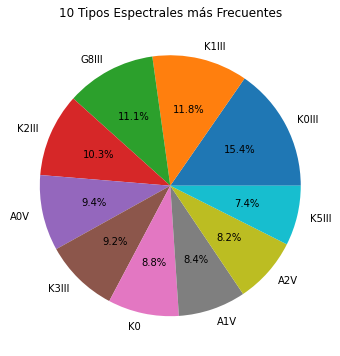

In [154]:
# Definimos las 10 categorías más frecuentes de los tipos espectrales
conteos_top_10 = conteos[ordenados[:10]]

# Hacemos el gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(conteos_top_10, labels=top_10, autopct='%1.1f%%')
plt.title('10 Tipos Espectrales más Frecuentes')
plt.show()

**Pregunta 3** (4 puntos)

Seleccionar todas las estrellas de tipo espectral K0III y hacer un histograma de sus colores B-V:

• Estimar el número de bines a usar con la regla de Freeman & Diaconis. Usar color gris para el histograma.

• Calcule el promedio de B-V y márquelo encima del histograma con una linea vertical sólida negra. Coloque una etiqueta que indique “Promedio = x.xxx”, es decir, usando tres decimales (para hacer esto debe utilizar formateo de strings y no escribir el valor explícitamente en el código).

• Calcule la mediana de B-V y márquela encima del histograma con una linea vertical a trazos roja. Coloque una etiqueta que indique “Mediana = x.xxx”, es decir, usando tres decimales.

• Calcule la desviación estándar de B-V. Grafique un par de líneas punteadas verdes en posiciones que señalen el intervalo promedio-STD : promedio+STD. Indique el valor de la desviación estándar con una etiqueta (con el mismo formato que las cantidades anteriores).

• Calule los cuartiles Q1 y Q3 y márquelos usando lineas azules punteadas. Agregue etiquetas para indicar sus valores.

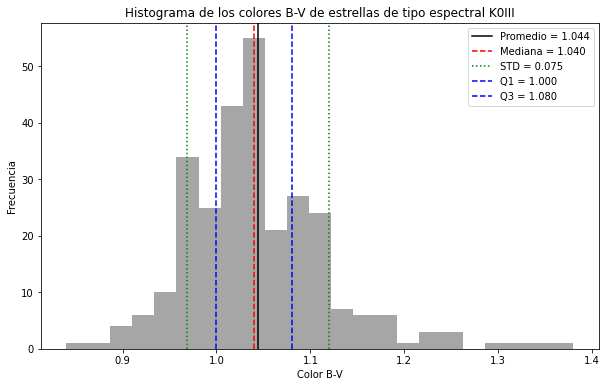

In [155]:
import numpy as np
from scipy.stats import gaussian_kde

# Cargamos los datos
data = np.loadtxt('bsc_sel.dat', dtype=str, usecols=(0, 1, 2, 3, 4))

# Seleccionamos las estrellas de tipo espectral K0III
estrellas = data[data[:, 4] == 'K0III']

# Seleccionamos los colores B-V de las estrellas
bv = estrellas[:, 3].astype(float)

# Eliminamos los valores NaN existentes
bv = bv[~np.isnan(bv)]

# Estimamos el número de bines a usar con la regla de Freeman & Diaconis
n_bins = int(np.ceil((max(bv) - min(bv)) / (2 * (np.percentile(bv, 75) - np.percentile(bv, 25)) / (len(bv) ** (1/3)))))

# Creamos un histograma de los colores B-V
plt.figure(figsize=(10,6))
plt.hist(bv, bins=n_bins, color='gray', alpha=0.7)

# Calcular el promedio de B-V
promedio = np.mean(bv)
plt.axvline(promedio, color='black', label=f'Promedio = {promedio:.3f}')

# Calculamos la mediana de B-V
mediana = np.median(bv)
plt.axvline(mediana, color='red', linestyle='--', label=f'Mediana = {mediana:.3f}')

# Calculamos la desviación estándar de B-V
std = np.std(bv)
plt.axvline(promedio - std, color='green', linestyle=':', label=f'STD = {std:.3f}')
plt.axvline(promedio + std, color='green', linestyle=':')

# Calculamos los cuartiles Q1 y Q3
q1 = np.percentile(bv, 25)
q3 = np.percentile(bv, 75)
plt.axvline(q1, color='blue', linestyle='--', label=f'Q1 = {q1:.3f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3 = {q3:.3f}')

# Agregamos título y etiquetas de ejes
plt.title('Histograma de los colores B-V de estrellas de tipo espectral K0III')
plt.xlabel('Color B-V')
plt.ylabel('Frecuencia')

# Mostramos la leyenda
plt.legend()

# Mostramos el gráfico
plt.show()

**Pregunta 4** (1 punto)

Haga un diagrama de caja de los colores B-V de las estrellas de tipo espectral K0III seleccionadas en la pregunta anterior. Use cruces de color verde para representar los valores atípicos (para esto puede usar la keyword “flierprops” del método “boxplot”).

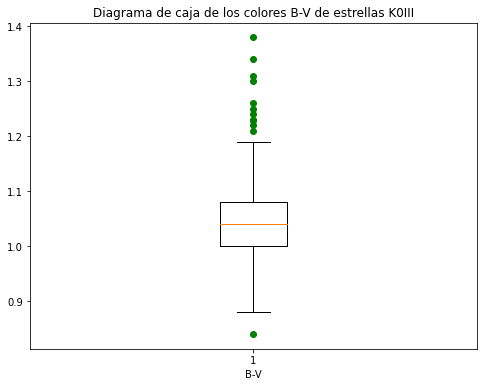

In [156]:
# Seleccionamos las estrellas de tipo espectral K0III
k0iii = data[data[:, 4] == 'K0III']

# Seleccionamos los colores B-V de las estrellas K0III
bv_k0iii = k0iii[:, 3].astype(float)

# Eliminamos los valores NaN existentes
bv_k0iii = bv_k0iii[~np.isnan(bv_k0iii)]

# Verificamos si hay datos (debido a que eliminamos los valores NaN)
if len(bv_k0iii) > 0:
    # Creamos el diagrama de caja
    plt.figure(figsize=(8, 6))
    plt.boxplot(bv_k0iii, flierprops=dict(markerfacecolor='green', markeredgecolor='green'))
    plt.title('Diagrama de caja de los colores B-V de estrellas K0III')
    plt.xlabel('B-V')
    plt.show()

**Pregunta 5** (3 puntos)

Haga en un solo gráfico, varios diagramas de caja para representar las distribuciones del color B-V de selecciones de estrellas correspondientes a los tipos espectrales siguientes: A0V, A1V, A2V, G8III, K0III, K3III y K5III. Ordene los diagramas de caja de izquierda a derecha siguiendo el orden de la lista anterior y agregue etiquetas en el eje horizontal del gráfico para indicar a qué tipo espectral corresponde cada diagrama de caja. Use cruces de color verde para representar los valores atípicos.

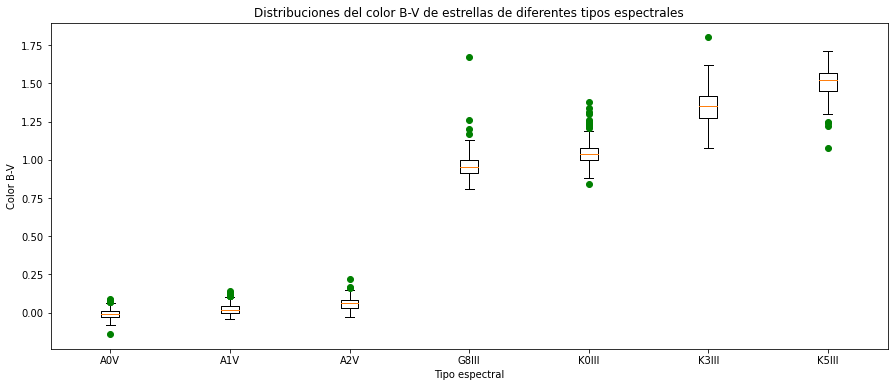

In [157]:
# Seleccionamos los tipos espectrales
tipos_espectrales = ['A0V', 'A1V', 'A2V', 'G8III', 'K0III', 'K3III', 'K5III']

# Creamos una figura con un tamaño específico
plt.figure(figsize=(15, 6))

# Iteramos sobre los tipos espectrales
for i, tipo_espectral in enumerate(tipos_espectrales):
    # Seleccionamos las estrellas del tipo espectral actual
    estrellas = data[data[:, 4] == tipo_espectral]

    # Seleccionamos los colores B-V de las estrellas
    bv = estrellas[:, 3].astype(float)

    # Eliminamos los valores NaN existentes
    bv = bv[~np.isnan(bv)]

    # Verificamos si hay datos (debido a que eliminamos los valores NaN)
    if len(bv) > 0:
        # Creamos el diagrama de caja para el tipo espectral actual
        plt.boxplot(bv, positions=[i+1], flierprops=dict(markerfacecolor='green', markeredgecolor='green'))

# Agregamos título y etiquetas
plt.xticks(range(1, len(tipos_espectrales)+1), tipos_espectrales)
plt.title('Distribuciones del color B-V de estrellas de diferentes tipos espectrales')
plt.xlabel('Tipo espectral')
plt.ylabel('Color B-V')

# Mostramos el gráfico
plt.show()

**Pregunta 6** (3 puntos)

Haga un gráfico igual al anterior, pero de la magnitud V de las estrellas de las selecciones (en vez de su color B-
V).

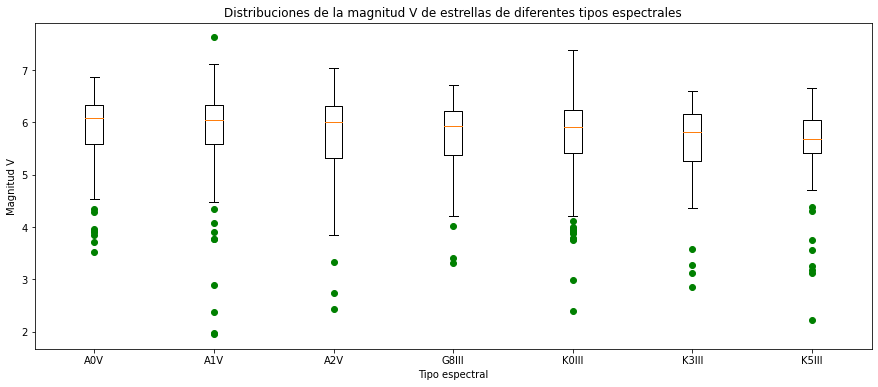

In [158]:
# Seleccionamos los tipos espectrales
tipos_espectrales = ['A0V', 'A1V', 'A2V', 'G8III', 'K0III', 'K3III', 'K5III']

# Creamos una figura con un tamaño específico
plt.figure(figsize=(15, 6))

# Iteramos sobre los tipos espectrales
for i, tipo_espectral in enumerate(tipos_espectrales):
    # Seleccionamos las estrellas del tipo espectral actual
    estrellas = data[data[:, 4] == tipo_espectral]

    # Seleccionamos las magnitudes V de las estrellas
    v = estrellas[:, 2].astype(float)

    # Eliminamos los valores NaN existentes
    v = v[~np.isnan(v)]

    # Verificamos si hay datos (debido a que eliminamos los valores NaN)
    if len(v) > 0:
        # Creamos el diagrama de caja para el tipo espectral actual
        plt.boxplot(v, positions=[i+1], flierprops=dict(markerfacecolor='green', markeredgecolor='green'))

# Agregamos título y etiquetas 
plt.xticks(range(1, len(tipos_espectrales)+1), tipos_espectrales)
plt.title('Distribuciones de la magnitud V de estrellas de diferentes tipos espectrales')
plt.xlabel('Tipo espectral')
plt.ylabel('Magnitud V')

# Mostramos el gráfico
plt.show()

## Parte II: catálogo de estrellas del bulbo galáctico
El archivo "bulbo_galactico.dat" contiene información para aproximadamente 9500 estrellas observadas por el mapeo espectroscópico APOGEE en la región central de la Vía Láctea. Sus columnas son:

• ID: identificador en el catálogo APOGEE.

• glon: longitud galáctica.

• glat: latitud galáctica.

• vrad: velocidad radial (km/s).

• fe_h: abundancia de hierro (metalicidad) [Fe/H].

• mg_fe: abundancia de magnesio [Mg/Fe].

• o_fe: abundancia de oxigeno [O/Fe].

**Pregunta 7** (4 puntos)

Crear un gráfico de dispersión de [Fe/H] (eje horizontal) versus [Mg/Fe] (eje vertical):

• Usar puntos grises de un tamaño suficientemente pequeño para evitar una excesiva saturación (el gráfico quedará algo saturado igualmente por la cantidad de puntos).

• Puede usar los límites -2.0 : 0.75 y -0.2 : 0.6 para los ejes horizontal y vertical, respectivamente.

• Divida el intervalo de metalicidad en 18 partes y considere solo aquellos intervalos en los que haya más de 5 estrellas. Para cada uno de ellos, calcular el valor de la mediana de [Mg/Fe] y use los puntos así calculados para graficar una curva mediana de la distribución de los datos. Use cruces rojas para graficar los puntos que determinan esta curva.

• Del mismo modo, estime lineas que indiquen los percentiles 5% y 95% de los valores de [Mg/Fe] a lo largo de los intervalos de metalicidad. Grafíquelos usando dos pares de lineas verdes.

• Calcule el MAD de [Mg/Fe] a lo largo de los intervalos de metalicidad. Use lineas magenta para indicar las curvas de mediana – MAD y mediana + MAD.

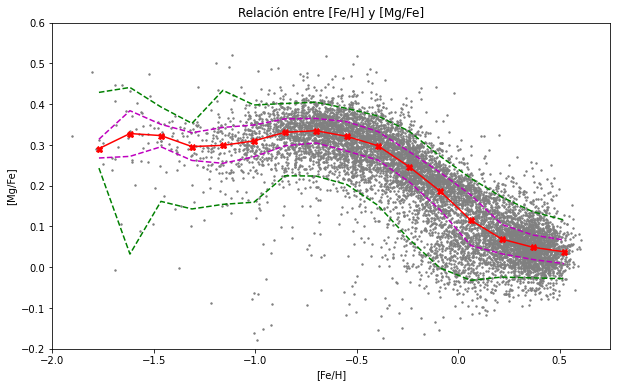

In [10]:
# Cargamos los datos
data = np.loadtxt('bulbo_galactico.dat', usecols=(4, 5))

# Seleccionamos los intervalos de metalicidad
metallicidad = data[:, 0]
mg_fe = data[:, 1]

# Dividimos el intervalo de metalicidad en 18 partes
intervalos = np.linspace(-2.0, 0.75, 19)

# Calculamos la mediana de [Mg/Fe] para cada intervalo
medianas = []
x_medianas = []
for i in range(len(intervalos) - 1):
    mascara = (metallicidad >= intervalos[i]) & (metallicidad < intervalos[i+1])
    if np.sum(mascara) > 5:
        medianas.append(np.median(mg_fe[mascara]))
        x_medianas.append((intervalos[i] + intervalos[i+1]) / 2)

# Calculamos los percentiles 5% y 95% de [Mg/Fe] para cada intervalo
percentiles_5 = []
percentiles_95 = []
x_percentiles = []
for i in range(len(intervalos) - 1):
    mascara = (metallicidad >= intervalos[i]) & (metallicidad < intervalos[i+1])
    if np.sum(mascara) > 5:
        percentiles_5.append(np.percentile(mg_fe[mascara], 5))
        percentiles_95.append(np.percentile(mg_fe[mascara], 95))
        x_percentiles.append((intervalos[i] + intervalos[i+1]) / 2)

# Calculamos el MAD de [Mg/Fe] para cada intervalo
mad = []
x_mad = []
for i in range(len(intervalos) - 1):
    mascara = (metallicidad >= intervalos[i]) & (metallicidad < intervalos[i+1])
    if np.sum(mascara) > 5:
        mad.append(np.median(np.abs(mg_fe[mascara] - np.median(mg_fe[mascara]))))
        x_mad.append((intervalos[i] + intervalos[i+1]) / 2)

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(metallicidad, mg_fe, s=2, c='gray')

# Graficamos la curva mediana, los percentiles 5% y 95% y las curvas de mediana - MAD y mediana + MAD
plt.plot(x_medianas, medianas, 'rX-')
plt.plot(x_percentiles, percentiles_5, 'g--')
plt.plot(x_percentiles, percentiles_95, 'g--')
plt.plot(x_mad, np.array(medianas) - np.array(mad), 'm--')
plt.plot(x_mad, np.array(medianas) + np.array(mad), 'm--')

# Agregamos título y etiquetas
plt.title('Relación entre [Fe/H] y [Mg/Fe]')
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')

# Establecemos los límites de los ejes
plt.xlim(-2.0, 0.75)
plt.ylim(-0.2, 0.6)

# Mostramos el gráfico
plt.show()

**Pregunta 8** (4 puntos)

En esta pregunta usted deberá elaborar dos mapas que muestren como las estrellas del bulbo de diferente metalicidad se mueven en el plano del cielo (en coordenadas galácticas). Para ello deberá hacer lo siguiente:

• Usando la metalicidad [Fe/H], separe dos grupos de estrellas, aquellas con valores menores (pobres en metales) y mayores (ricas en metales) que cero.

• Hacer dos gráficos, uno para cada selección, en los que grafique y discretize la distribución de estrellas en longitud vs latitud galáctica. Use como límites el intervalo -10 : 10 en ambos ejes. Al hacer los bines bidimensionales considere entre 13 y 16 bines en cada dirección. Elija la cantidad de bines que le parezca que ofrece la mejor visualización de la distribución de los datos.

• Usando esta discretización 2D de los datos, calcular en cada bin la desviación estándar de la velocidad radial. Incluir una barra de colores apropiadamente etiquetada.

• Para poder comparar ambos gráficos (mapas cinemáticos) definir sus rangos dinámicos (esto es, los valores mínimo y máximo de la barra de colores) de tal manera que sean los mismos. El valor inferior es 0 km/s (la mínima dispersión posible). El máximo valor estímelo al observar el rango de los valores en los mapas como definidos automáticamente por matplotlib antes de definirlos a mano.

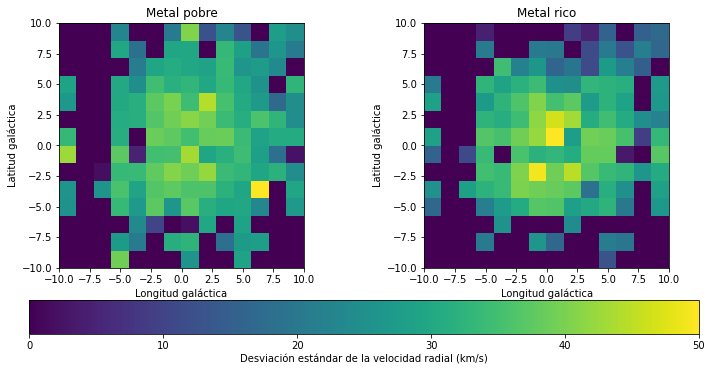

In [12]:
from matplotlib.colors import Normalize

# Cargamos los datos
data = np.loadtxt('bulbo_galactico.dat', usecols=(1, 2, 3, 4))

# Separamos las estrellas en dos grupos según su metalicidad
metal_pobre = data[data[:, 3] < 0]
metal_rico = data[data[:, 3] >= 0]

# Definimos los límites para los ejes
limite_x = (-10, 10)
limite_y = (-10, 10)

# Se define el número de bines para la discretización 2D
nbins_x = 14
nbins_y = 14

# Creamos los mapas cinemáticos para cada grupo de estrellas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, (grupo, titulo) in enumerate(zip([metal_pobre, metal_rico], ['Metal pobre', 'Metal rico'])):
    
    # Discretización de la distribución de estrellas en longitud vs latitud galáctica
    hist, xedges, yedges = np.histogram2d(grupo[:, 0], grupo[:, 1], bins=(nbins_x, nbins_y), range=(limite_x, limite_y))

    # Calculamos la desviación estándar de la velocidad radial en cada bin
    std_vrad = np.zeros(hist.shape)
    for j in range(hist.shape[0]):
        for k in range(hist.shape[1]):
            if hist[j, k] > 0:
                std_vrad[j, k] = np.std(grupo[(grupo[:, 0] >= xedges[j]) & (grupo[:, 0] < xedges[j+1]) & (grupo[:, 1] >= yedges[k]) & (grupo[:, 1] < yedges[k+1]), 2])

    # Creamos el mapa cinemático
    axs[i].imshow(std_vrad.T, origin='lower', cmap='viridis', extent=(xedges[0], xedges[-1], yedges[0], yedges[-1]))
    axs[i].set_title(titulo)
    axs[i].set_xlabel('Longitud galáctica')
    axs[i].set_ylabel('Latitud galáctica')

# Definimos el rango dinámico para la barra de colores
vmin = 0
vmax = 50

# Creamos la barra de colores
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=Normalize(vmin=vmin, vmax=vmax)), ax=axs, orientation='horizontal', pad=0.1)
cbar.set_label('Desviación estándar de la velocidad radial (km/s)')

# Mostramos el gráfico
plt.show()

**Pregunta 9** (2 puntos)

Haga un gráfico de dispersión de la abundancia de magnesio versus la de oxígeno. Ambas cantidades parecen aumentar juntas. En efecto, ambos elementos químicos son producidos en el mismo sitio astrofísico (explosión como supernova de estrellas masivas). Calcule el coeficiente de correlación de estas dos variables ¿confirma su valor la presunta relación entre estas dos cantidades?

Coeficiente de correlación: 0.9179244864480409


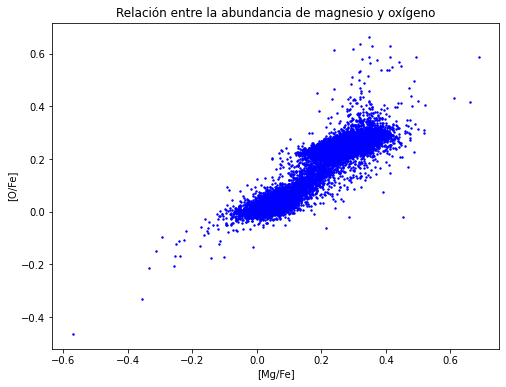

¿Confirma su valor la presunta relación entre estas dos cantidades?: El valor del coeficiente de correlación confirma la presunta relación entre estas dos cantidades, debido a que al ejecutar el código se obtiene un valor 0.8, lo que demuestra una relación lineal positiva.


In [18]:
# Cargamos los datos
data = np.loadtxt('bulbo_galactico.dat', usecols=(5, 6))

# Creamos el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], s=2, c='blue')
plt.xlabel('[Mg/Fe]')
plt.ylabel('[O/Fe]')
plt.title('Relación entre la abundancia de magnesio y oxígeno')

# Calculamos el coeficiente de correlación
coeficiente_correlacion = np.corrcoef(data[:, 0], data[:, 1])[0, 1]
print('Coeficiente de correlación:', coeficiente_correlacion)

# Mostramos el gráfico
plt.show()

# Respuesta 
print("¿Confirma su valor la presunta relación entre estas dos cantidades?: El valor del coeficiente de correlación confirma la presunta relación entre estas dos cantidades, debido a que al ejecutar el código se obtiene un valor 0.8, lo que demuestra una relación lineal positiva.")